In [1]:
from retinaface import RetinaFace
from insightface.app import FaceAnalysis
import cv2
import mediapipe
import scrfd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = 'test.jpg'
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = RetinaFace.detect_faces(img)

In [85]:
faces

{'face_1': {'score': 0.9988269209861755,
  'facial_area': [85, 77, 165, 192],
  'landmarks': {'right_eye': [109.97802, 119.3062],
   'left_eye': [145.89417, 118.513435],
   'nose': [130.32759, 136.19762],
   'mouth_right': [112.019516, 158.12157],
   'mouth_left': [146.304, 157.0472]}}}

In [72]:
def retina(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = RetinaFace.detect_faces(img)
    landmarks = []
    cropfaces = []
    for facekey in faces.keys():
        #solves faces
        facearea = faces[facekey]['facial_area']
        x0,y0,x1,y1 = facearea[0],facearea[1],facearea[2],facearea[3]
        face = img[y0:y1,x0:x1]
        cropfaces.append(face)

        # solves landmarks
        lmks = faces[facekey]['landmarks']
        right_eye = lmks['left_eye']
        left_eye = lmks['right_eye']
        nose = lmks['nose']
        #notice that the keypoints in retinaface is oppsite to the view
        mouth_right = lmks['mouth_left']
        mouth_left = lmks['mouth_right']
        landmark = [[left_eye[0], left_eye[1]],
                    [right_eye[0], right_eye[1]],
                    [nose[0], nose[1]],
                    [mouth_left[0], mouth_left[1]],
                    [mouth_right[0], mouth_right[1]]]
        # transform to cropped corridnator
        for i in range(len(landmark)):
            landmark[i][0] -= x0
            landmark[i][1] -= y0
        landmarks.append(landmark)
    return cropfaces,landmarks

# plt.imshow(cropfaces[0])

In [73]:
cropface,landmark = retina('test.jpg')

In [77]:
for i in range(len(landmark[0])):
    x  = int(landmark[0][i][0])
    y = int(landmark[0][i][1])
    cv2.circle(cropface[0],(x,y), 1, (0,0,255) , 2)

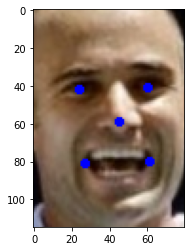

In [78]:
plt.imshow(cropface[0])

In [46]:
img = cropfaces[0]

In [67]:
for i in range(len(landmark)):
    x  = int(landmark[i][0])
    y = int(landmark[i][1])
    cv2.circle(cropfaces[0],(x,y), 1, (0,0,255) , 2)

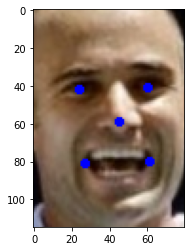

In [68]:
plt.imshow(cropfaces[0])

In [79]:
import mtcnn

In [105]:
def mtcnn_landmarks(img):
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(img)
        crop_faces = []
        landmarks = []
        for face in faces:
                x0,y0,w,h = face['box'][0],face['box'][1],face['box'][2],face['box'][3]
                left_eye = face["keypoints"]["left_eye"]
                right_eye = face["keypoints"]["right_eye"]
                nose = face["keypoints"]["nose"]
                mouth_left = face["keypoints"]["mouth_left"]
                mouth_right = face["keypoints"]["mouth_right"]
                landmark = [[left_eye[0], left_eye[1]],
                                [right_eye[0], right_eye[1]],
                                [nose[0], nose[1]],
                                [mouth_left[0], mouth_left[1]],
                                [mouth_right[0], mouth_right[1]]]
                for i in range(len(landmark)):
                        landmark[i][0] -= x0
                        landmark[i][1] -= y0
                crop = img[y0:y0+h,x0:x0+w]
                landmarks.append(landmark)
                crop_faces.append(crop)
        return crop_faces,landmarks

In [110]:
faces,landmarks = mtcnn_landmarks('test.jpg')

1/1 [==============================] - 0s 30ms/step


In [5]:
import scrfd
import cv2

In [2]:
faces,kpss = scrfd.detect('test.jpg')

[[ 85.88715     75.97593    165.59491    189.83047      0.85488737]] [[[110.27215  118.64255 ]
  [146.69495  116.34841 ]
  [132.2059   137.47575 ]
  [112.903824 156.33478 ]
  [148.03448  154.14897 ]]]


In [13]:
kpss

[array([[25.272148, 43.642548],
        [61.694946, 41.34841 ],
        [47.205902, 62.475754],
        [27.903824, 81.33478 ],
        [63.034485, 79.14897 ]], dtype=float32)]

In [17]:
faces[0].shape

(114, 80, 3)

In [18]:
face = faces[0]

In [20]:
face.shape

(114, 80, 3)

In [3]:
landmark = kpss[0]
for i in range(len(landmark)):
    x  = int(landmark[i][0])
    y = int(landmark[i][1])
    print(x,y)
    cv2.circle(faces[0],(x,y), 1, (0,0,255) , 2)

25 43
61 41
47 62
27 81
63 79


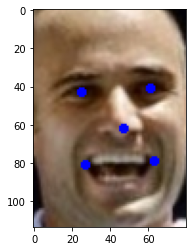

In [4]:
plt.imshow(faces[0])